In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
overall_ratings_fp = './data/overall_ratings.csv'
per_turn_ratings_fp = './data/per_turn_ratings.csv'
criteria_ratings_user = './data/criteria_ratings/user.csv'
criteria_ratings_observer = './data/criteria_ratings/observer.csv'
criteria_ratings_self = './data/criteria_ratings/self.csv'

df_OR = pd.read_csv(overall_ratings_fp)
df_PTR = pd.read_csv(per_turn_ratings_fp)
df_CR_User= pd.read_csv(criteria_ratings_user)
df_CR_Observer = pd.read_csv(criteria_ratings_observer)
df_CR_Self = pd.read_csv(criteria_ratings_self)

df_OR.drop(columns=['Convsation_Id'], inplace=True)
df_PTR.drop(columns=['Conversation_ID'], inplace=True)
df_CR_User.drop(columns=["Conversation_Id"], inplace=True)
df_CR_Observer.drop(columns=["Conversation_Id"], inplace=True)
df_CR_Self.drop(columns=["Conversation_Id"], inplace=True)


### Variance Analysis For All Ratings

In [65]:
# Variance Calculation
var_overall = df_OR.var()
var_per_turn = df_PTR.var()
var_user = df_CR_User.var()
var_observer = df_CR_Observer.var()
var_self = df_CR_Self.var()

## Overall Ratings

In [66]:
# Overall ratings
df_OR.describe()


,User_Rating,Observer_Rating,Self_Rating
count,530.000000,530.000000,530.000000
mean,8.871698,8.589623,8.738679
std,0.975383,0.920767,0.780259
min,1.000000,1.000000,1.000000
25%,9.000000,8.500000,9.000000
50%,9.000000,9.000000,9.000000
75%,9.000000,9.000000,9.000000
max,10.000000,9.000000,9.000000


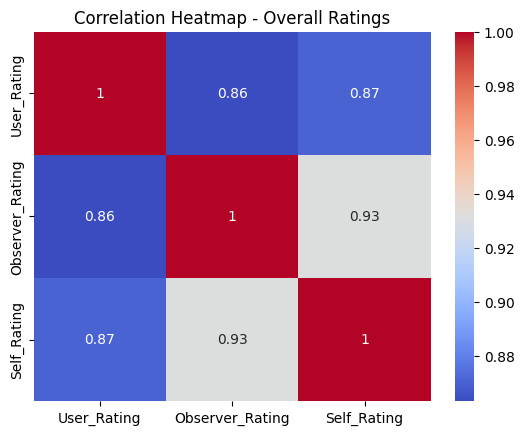

In [67]:
OR_corr_matrix = df_OR.corr()
sns.heatmap(OR_corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap - Overall Ratings')
plt.show()


## Per Turn Ratings

In [68]:
# Per turn ratings
df_PTR = df_PTR.apply(pd.to_numeric, errors='coerce')
df_PTR.describe()

,Turn_1,Turn_2,Turn_3,Turn_4,Turn_5,Turn_6,Turn_7,Turn_8,Turn_9,Turn_10,...,Turn_16,Turn_17,Turn_18,Turn_19,Turn_20,Turn_21,Turn_22,Turn_23,Turn_24,Turn_25
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,526.000000,526.000000,525.000000,524.000000,523.000000,520.000000,518.000000,516.000000,516.000000,514.000000
mean,8.474528,8.476415,8.480189,8.517925,8.529245,8.500943,8.500000,8.503774,8.454717,8.440566,...,8.347909,8.364068,8.395238,8.369275,8.402486,8.304808,8.321429,8.289729,8.281977,8.193580
std,1.017248,0.890992,1.017839,0.901668,0.937858,0.984040,1.003303,0.990973,1.058687,1.091190,...,1.257990,1.268318,1.190963,1.084653,1.138853,1.342529,1.284284,1.299690,1.371855,1.514381
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,...,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000
50%,8.500000,8.500000,8.500000,9.000000,9.000000,9.000000,9.000000,8.500000,8.500000,9.000000,...,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000,8.500000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.500000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.500000,9.000000,9.000000,9.000000


## User Ratings

In [69]:
# Critera - User
df_CR_User.describe()

,Clarity_and_Simplicity,Relevance_and_Accuracy,Tone_and_Supportiveness,Adaptability,Consistency_and_Flow
count,530.000000,530.000000,530.000000,530.000000,530.000000
mean,8.890566,8.934906,8.913208,8.683962,8.714151
std,0.601908,0.660103,0.551690,0.992708,0.932448
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,9.000000,9.000000,9.000000,9.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000
max,9.000000,10.000000,9.500000,9.000000,9.000000


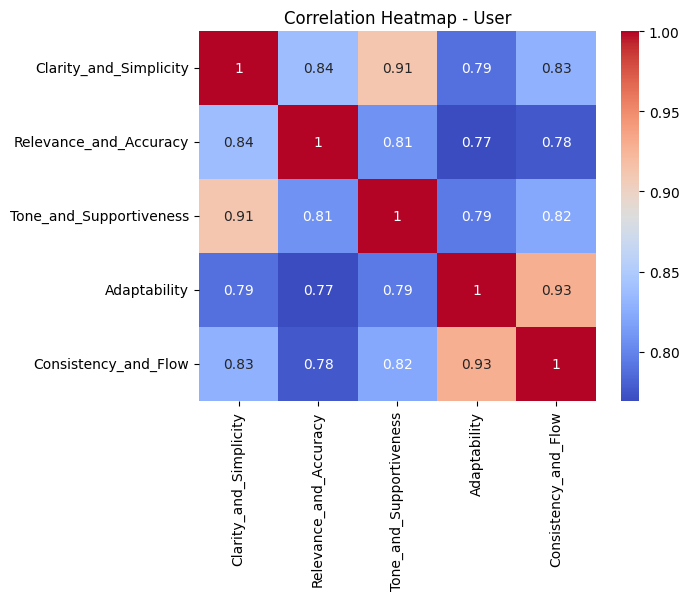

In [70]:
CR_User_corr_matrix = df_CR_User.corr()
sns.heatmap(CR_User_corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap - User')
plt.show()

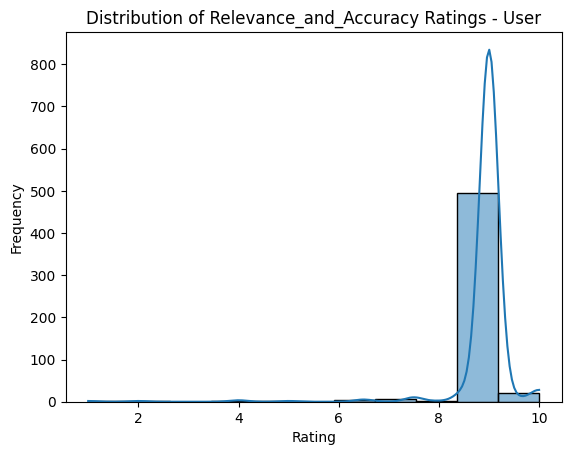

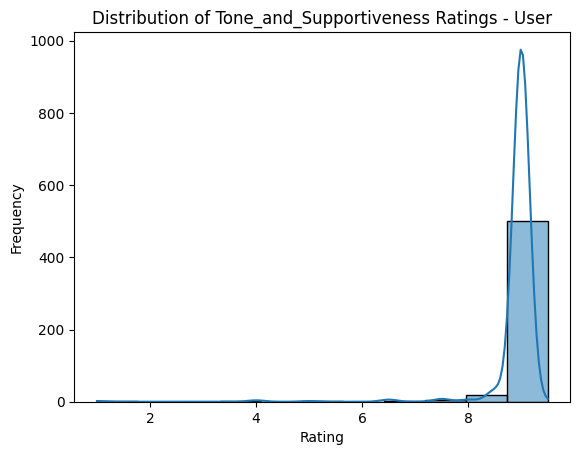

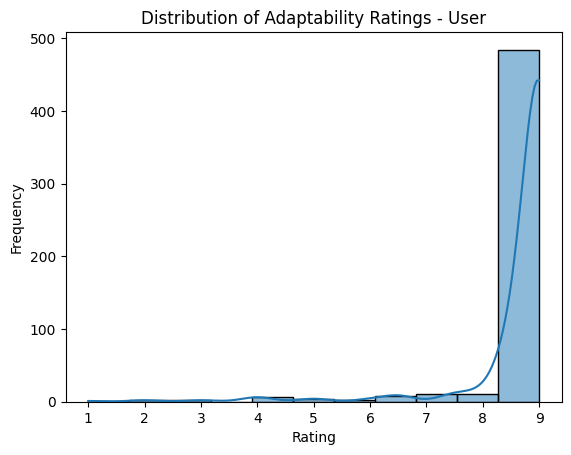

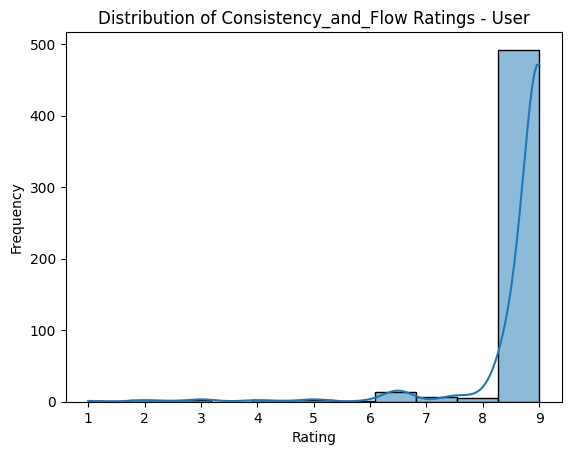

In [71]:
# Distribution over different criteria
for column in df_CR_User.columns[1:]:
    sns.histplot(df_CR_User[column], kde=True)
    plt.title(f'Distribution of {column} Ratings - User')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()


In [72]:
print(np.percentile(df_CR_User['Clarity_and_Simplicity'], 50))

9.0


## Observer Ratings

In [73]:
# Criteria - Observer
df_CR_Observer.describe()

,Clarity_and_Simplicity,Relevance_and_Accuracy,Tone_and_Supportiveness,Adaptability,Consistency_and_Flow
count,530.000000,530.000000,530.000000,530.000000,530.000000
mean,8.810377,9.141509,8.833019,8.466038,8.443396
std,0.721913,1.051497,0.690842,1.108388,1.134026
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,9.000000,9.000000,8.500000,8.500000
50%,9.000000,9.000000,9.000000,9.000000,9.000000
75%,9.000000,10.000000,9.000000,9.000000,9.000000
max,9.000000,10.000000,9.000000,9.000000,10.000000


In [74]:
print(np.percentile(df_CR_Observer['Tone_and_Supportiveness'], 50))

9.0


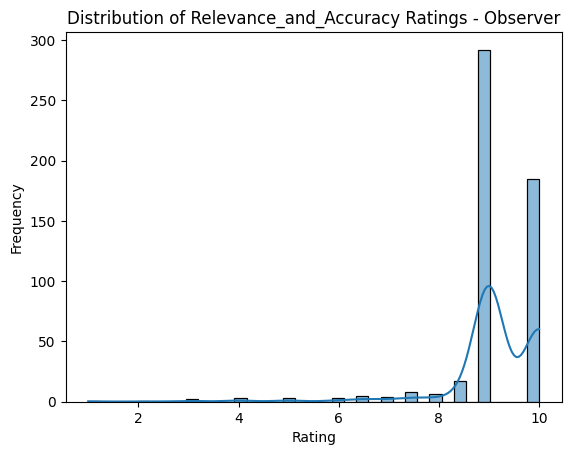

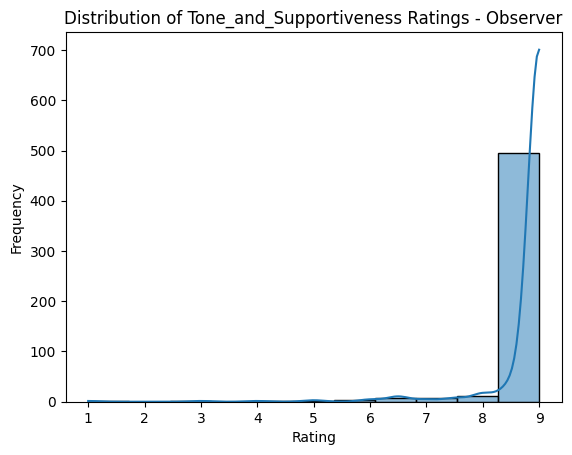

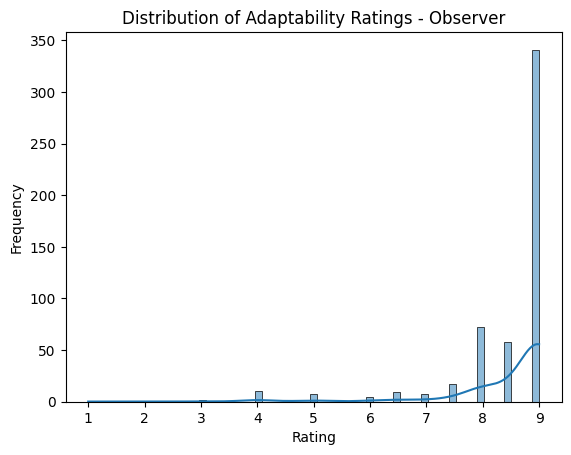

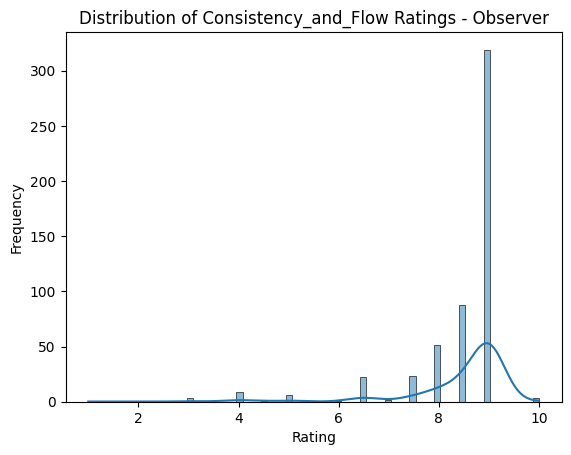

In [75]:
for column in df_CR_Observer.columns[1:]:
    sns.histplot(df_CR_Observer[column], kde=True)
    plt.title(f'Distribution of {column} Ratings - Observer')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

## Self Ratings

In [76]:
# Criteria - Self
df_CR_Self.head()

,Clarity_and_Simplicity,Relevance_and_Accuracy,Tone_and_Supportiveness,Adaptability,Consistency_and_Flow
0,9.0,9.0,9.0,8.0,9.0
1,8.5,9.0,9.0,9.0,8.5
2,9.0,9.0,9.0,8.0,9.0
3,8.5,9.0,9.0,8.5,8.5
4,9.0,9.0,9.0,9.0,9.0


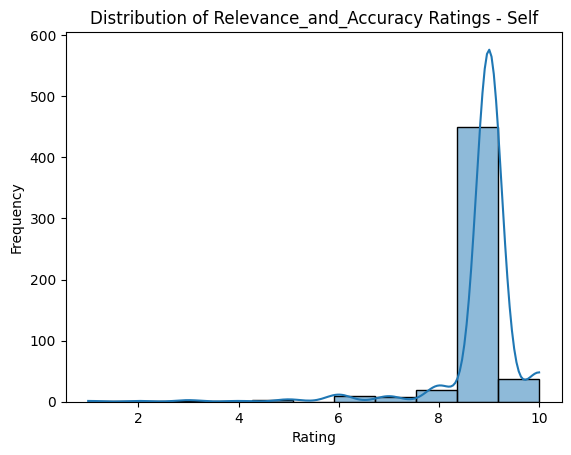

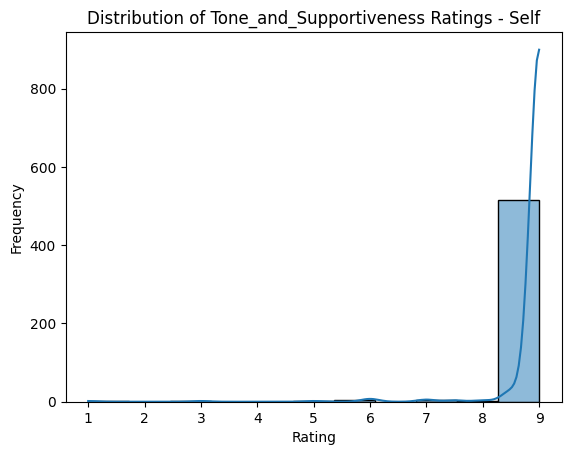

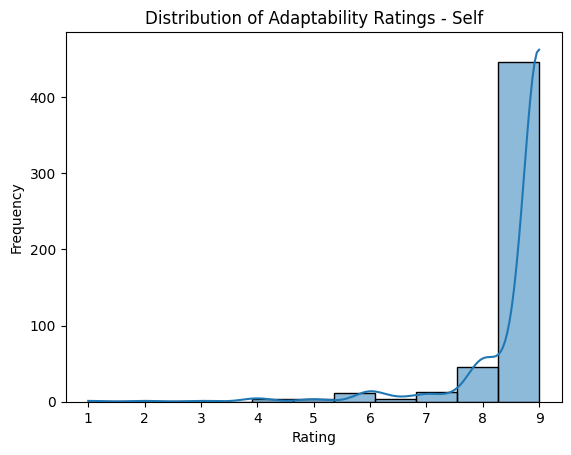

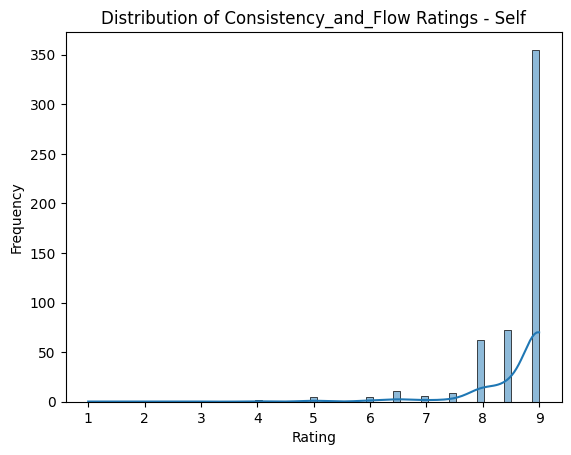

In [77]:
for column in df_CR_Self.columns[1:]:
    sns.histplot(df_CR_Self[column], kde=True)
    plt.title(f'Distribution of {column} Ratings - Self')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
